In [1]:
import sys
import localSettings as ls
import os
print(ls.main_path)

/Users/meghna-local/PELEE_eff/


In [2]:
main_path = ls.main_path
sys.path.append(main_path)

In [3]:
from datetime import datetime
now = datetime.now()
date_time = now.strftime("%m%d%Y")
print("date and time:",date_time)

date and time: 03022022


In [4]:
import plotter
import importlib
importlib.reload(plotter)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
#if USEBDT:
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
import pandas as pd
from matplotlib import pyplot as plt

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

[1043.571  1982.9882 2552.515  2558.8645 1461.4658 1137.9657 1500.0968
 1596.1425]
[392.9398  320.7208  377.00986 420.0312  275.34308 279.66852 214.47801
 348.47162]
[1043.571  1982.9882 2552.515  2558.8645 1461.4658 1137.9657 1500.0968
 1596.1425]


/Users/meghna-local/miniconda3/envs/python3LEE_fresh/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  from ipykernel import kernelapp as app
/Users/meghna-local/miniconda3/envs/python3LEE_fresh/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


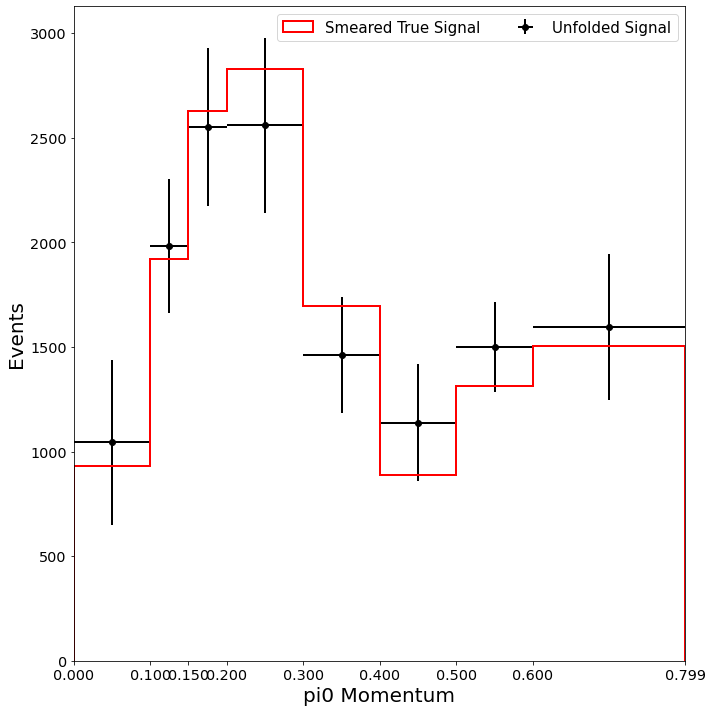

In [5]:
rf = uproot.open("MomClosure_FDS_reg_on_Identity.root")
th1= rf["unf_signal"]
err1 = rf['absError']
th2 = rf['smeared_true_sig']
unf_COV = rf['unf_cov']
unf_COV_vals = unf_COV.values
true_vals = th2.values
bin_edges = th1.edges
bin_vals = th1.values
err1_vals = err1.values
bincenters = 0.5*(bin_edges[1:]+bin_edges[:-1])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
#ax.hist(bincenters,bins=bin_edges, weights= bin_vals, histtype='step',label='Unfolded Signal',color='black',linestyle='dashed', lw = 2)
ax.errorbar(bincenters,bin_vals,yerr=err1_vals,xerr=(bin_edges[:-1]-bin_edges[1:])/2,fmt = 'o-',label= 'Unfolded Signal',linestyle='', color='black', lw = 2 )
ax.hist(bincenters,bins=bin_edges,weights=true_vals, histtype='step',label='Smeared True Signal',color='red', lw = 2)
ax.set_xlabel('pi0 Momentum', fontsize=20)
ax.set_ylabel('Events', fontsize=20)
ax.set_xticks(bin_edges)
ax.set_xlim(bin_edges[0],bin_edges[-1])
#ax.hist(bins[:-1], bins, weights=n,color='lightgray',label='signal no sel.')
ax.legend(ncol=2, prop={'size': 15})
#ax.grid(True)
plt.tight_layout()
fig.show()
print(bin_vals)
print(err1_vals)
'''handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]
plt.legend(handles=new_handles, labels=labels,loc=2,ncol=3,frameon=False, prop={'size': 15})
'''
print(bin_vals)

In [6]:
#FV for PeLEE
x = [3.45,249.8]
y = [-109.53, 111.47]
z = [20.1, 986.9]
ro_Ar = 1.3836
N_A = 6.02214e23
m_Ar = 39.95
for i in range(1):
    xx = x[i+1]- x[i]
    yy = y[i+1]- y[i]
    zz = z[i+1]- z[i]
    V = xx*yy*zz

N_targets = (ro_Ar * V * N_A)/m_Ar
flux_cm2 = 5.01e11 # cm^-2
print(N_targets)
print(flux_cm2)

1.0978072619636846e+30
501000000000.0


In [7]:
b_width = (bin_edges[1:]- bin_edges[:-1])
b_width

array([0.1  , 0.05 , 0.05 , 0.1  , 0.1  , 0.1  , 0.1  , 0.199])

In [8]:
xsec_unf_sig = bin_vals/b_width
xsec_unf_sig/= (N_targets*flux_cm2)
xsec_unf_sig

array([1.89739694e-38, 7.21084718e-38, 9.28184806e-38, 4.65246875e-38,
       2.65720363e-38, 2.06902313e-38, 2.72744160e-38, 1.45832643e-38])

In [9]:
xsec_true_vals = true_vals/b_width
xsec_true_vals/= (N_targets*flux_cm2)
xsec_true_vals

array([1.69521674e-38, 6.99048909e-38, 9.56079975e-38, 5.13933004e-38,
       3.08276804e-38, 1.61803887e-38, 2.38923292e-38, 1.37261255e-38])

In [10]:
unf_COV = rf['unf_cov']
unf_COV_vals = unf_COV.values
unf_COV_vals

array([[154401.67   , -24872.154  , -55710.72   ,  62301.633  ,
         58724.246  ,  -5382.952  ,  -4298.6943 ,  26199.748  ],
       [-24872.154  , 102861.82   ,  97483.94   , -11976.425  ,
         12902.396  ,  49005.977  ,  21773.846  , -19463.975  ],
       [-55710.72   ,  97483.94   , 142136.42   ,  44415.72   ,
         -4640.526  ,  31516.549  ,  45203.22   ,   2156.9316 ],
       [ 62301.633  , -11976.425  ,  44415.72   , 176426.2    ,
         45619.54   , -43304.28   ,  23600.695  , 102136.9    ],
       [ 58724.246  ,  12902.396  ,  -4640.526  ,  45619.54   ,
         75813.805  ,    241.41034,  -1712.3007 ,  43644.95   ],
       [ -5382.952  ,  49005.977  ,  31516.549  , -43304.28   ,
           241.41034,  78214.484  ,  27043.977  , -54950.37   ],
       [ -4298.6943 ,  21773.846  ,  45203.22   ,  23600.695  ,
         -1712.3007 ,  27043.977  ,  46000.82   ,   1306.2814 ],
       [ 26199.748  , -19463.975  ,   2156.9316 , 102136.9    ,
         43644.95   , -54950.37  

In [11]:
np.diag(unf_COV_vals)
err_ = np.diag(np.sqrt(unf_COV_vals))
unf_xsec = unf_COV_vals/(b_width*b_width* N_targets*flux_cm2*N_targets*flux_cm2)
err_xsec = np.diag(np.sqrt(unf_xsec))
err_xsec

/Users/meghna-local/miniconda3/envs/python3LEE_fresh/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/Users/meghna-local/miniconda3/envs/python3LEE_fresh/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


array([7.14434098e-39, 1.16625434e-38, 1.37094130e-38, 7.63691081e-39,
       5.00622450e-39, 5.08486899e-39, 3.89959013e-39, 3.18383459e-39])

/Users/meghna-local/miniconda3/envs/python3LEE_fresh/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/meghna-local/miniconda3/envs/python3LEE_fresh/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


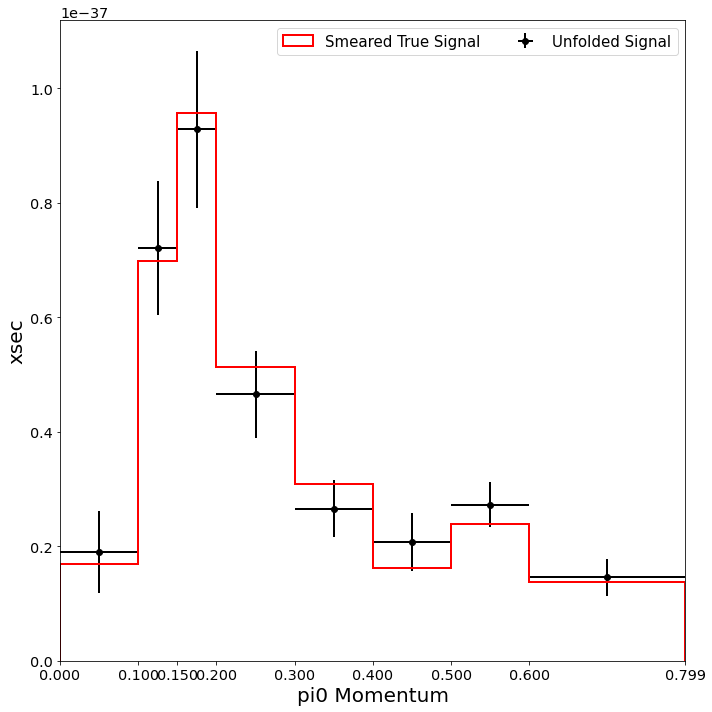

In [12]:
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(111)
ax1.errorbar(bincenters,xsec_unf_sig,yerr=err_xsec,xerr=(bin_edges[:-1]-bin_edges[1:])/2,fmt = 'o-',label= 'Unfolded Signal',linestyle='', color='black', lw = 2 )
ax1.hist(bincenters,bins=bin_edges,weights=xsec_true_vals, histtype='step',label='Smeared True Signal',color='red', lw = 2)
ax1.set_xlabel('pi0 Momentum', fontsize=20)
ax1.set_ylabel('xsec', fontsize=20)
ax1.set_xticks(bin_edges)
ax1.set_xlim(bin_edges[0],bin_edges[-1])
#ax.hist(bins[:-1], bins, weights=n,color='lightgray',label='signal no sel.')
ax1.legend(ncol=2, prop={'size': 15})
#ax.grid(True)
plt.tight_layout()
fig.show()